In [9]:
import sys
sys.path.append('../')
#%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from utility import util
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb

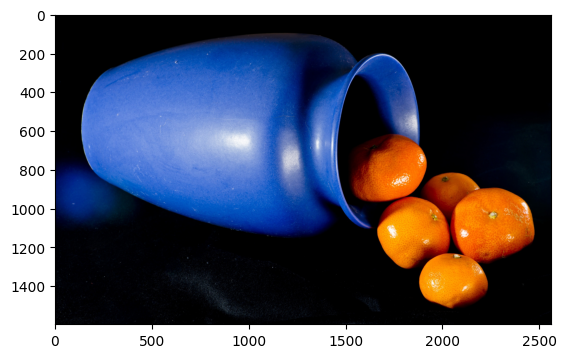

In [10]:
img = cv.imread('lab5.jpg')
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

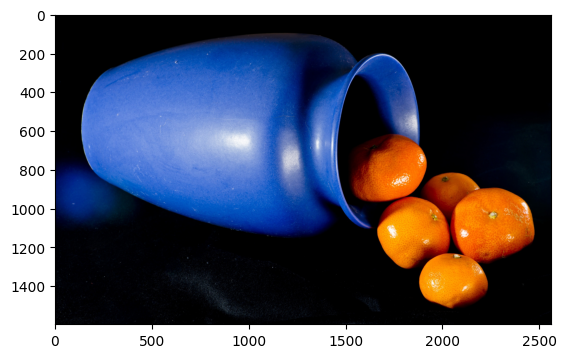

In [11]:
#img = input_image
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)

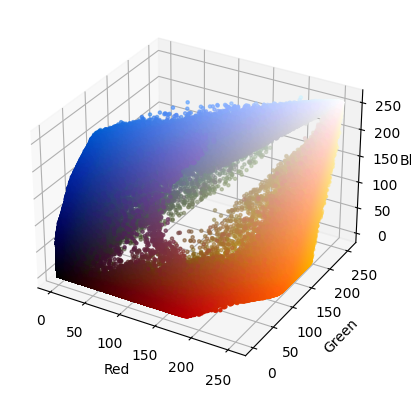

In [12]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

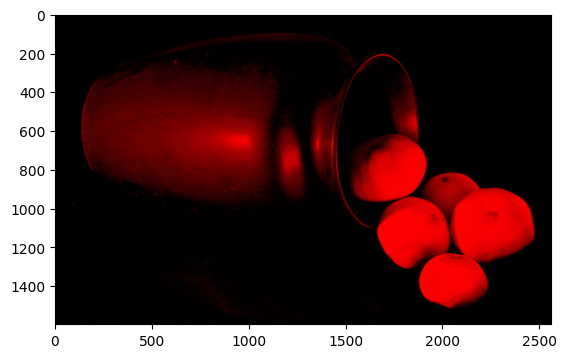

In [13]:
red = image_rgb.copy()
# set blue and green channels to 0
red[:, :, 1] = 0
red[:, :, 2] = 0
# RGB - Red
plt.imshow(red)
plt.show()


In [15]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

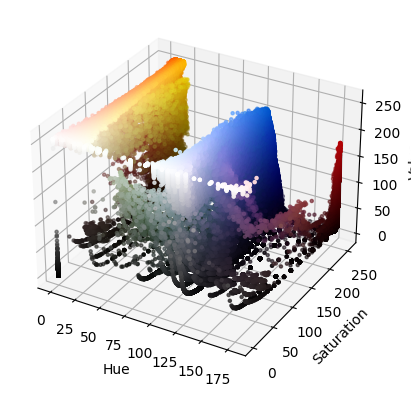

In [16]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

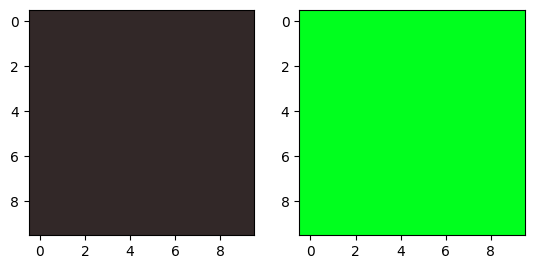

In [17]:
lower_blue = np.array([0,50,50])
upper_blue = np.array([90,255,255])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

In [18]:
#Найдем на изображении цвета подходящие под маску от светлосинего до темносинего. И добавим маску на изображение.

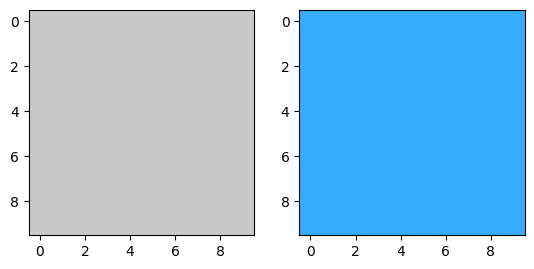

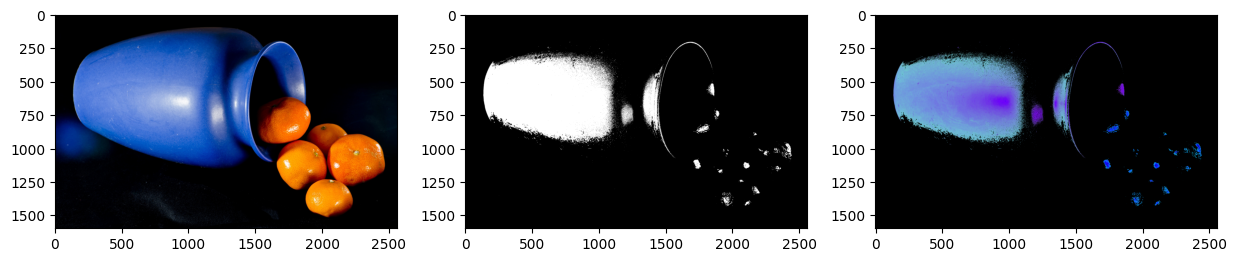

In [19]:
light_white = (0, 0, 200)
dark_white = (145, 200, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

mask_white = cv.inRange(image_hsv, light_white, dark_white)
result_white = cv.bitwise_and(image_hsv, image_hsv, mask=mask_white)
plt.figure(figsize=(15,20))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_white)
plt.show()

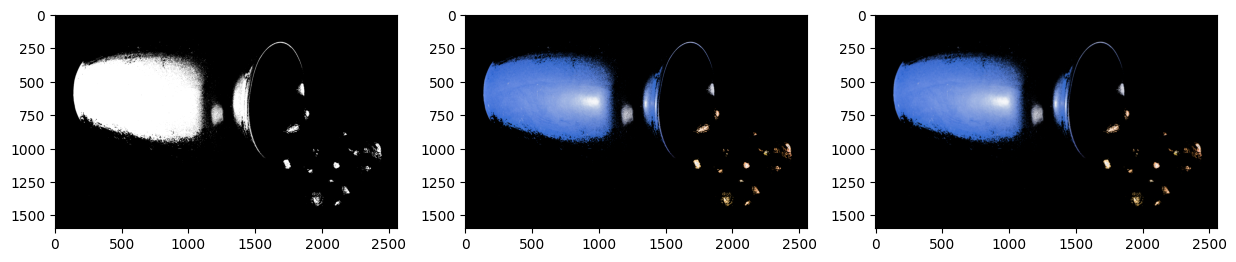

In [20]:
"""Применим обе маски и сгладим изображение"""
mask=mask_white
final_mask = mask + mask_white

final_result = cv.bitwise_and(image_rgb, image_rgb, mask=final_mask)
blur = cv.GaussianBlur(final_result, (7, 7), 0)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_result)
plt.subplot(1, 3, 3)
plt.imshow(blur)
plt.show()

'Пробуем сделать цветовую сегментацию'

<Figure size 1500x2000 with 0 Axes>

<Axes: >

<Axes: >

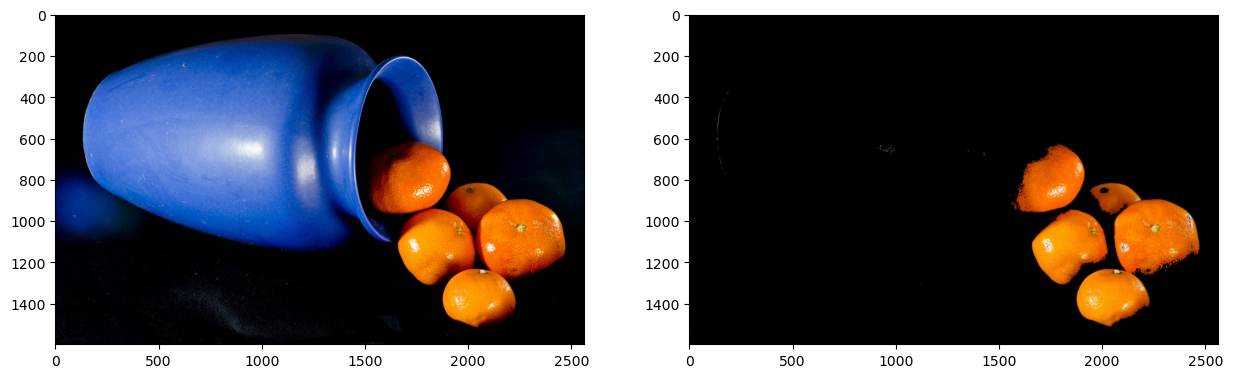

In [84]:
"""Пробуем сделать цветовую сегментацию"""

def segment_image(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = (0, 0, 0)
    upper_blue = (0, 0, 0)

    # Apply the blue mask
    mask = cv.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
  #  light_white = (0, 60, 200)
   # dark_white = (15, 255, 255)

    light_white = (8, 0, 130 )
    dark_white = (98, 255, 255)
    # Apply the white mask
    mask_white = cv.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv.GaussianBlur(result, (7, 7), 0)
    return blur


result = segment_image(image_rgb)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()


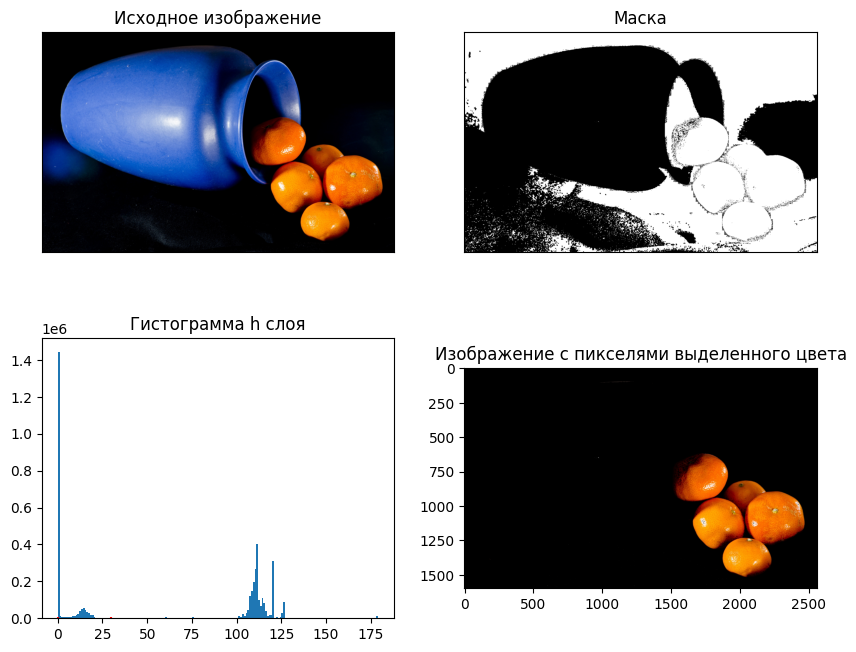

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
image3 = cv.imread('lab5.jpg')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 0
high_h = 30

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()
